# Trends and Forecasts

Connect to Google Trends and get related queries

Given a list of keywords, pull google trends data and predict the direction

Forecast what trends are growing, flat, or decreasing.

> [1-click Run on Google Colab](https://colab.research.google.com/github/FrontAnalyticsInc/data-winners/blob/main/analysis-trends/trends-and-forecasts.ipynb)


### About Alton

Follow me for more data and tutorials

- twitter: https://twitter.com/alton_lex @alton_lex



### About Data Winners

Join now: https://datawinners.gumroad.com/l/data-analytics-for-seoGet 

- private Discord community

- Video tutorials

- Feedback and support on this and other scripts

# Install Google Trends Library

In [ ]:
#install pytrends
!pip install pytrends

#import the libraries
import pandas as pd
from pytrends.request import TrendReq
from datetime import datetime, timedelta

# use custom header
requests_args = {
    'headers': {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
    }
}

# Hello World

Pull top trending topics on Google for today

In [40]:

pytrend = TrendReq(requests_args=requests_args)

#get today's treniding topics
trendingtoday = pytrend.today_searches(pn='US')

# Get Google Top Charts
for querystring in trendingtoday:
    q = querystring.split("q=")[1].split("&")[0].replace("+"," ")
    print(q)

Cassidy Hutchinson
Morgan Wallen
Powerball jackpot


# Related Queries

Given one or more keywords, return a list of all the related queries

In [41]:

#build model
pytrend = TrendReq(requests_args=requests_args)

#provide your search terms
kw_list=['"content marketing"']
pytrend.build_payload(kw_list=kw_list)


#get related queries
related_queries = pytrend.related_queries()
related_queries.values()

#build lists dataframes

top = list(related_queries.values())[0]['top']
rising = list(related_queries.values())[0]['rising']

#convert lists to dataframes

dftop = pd.DataFrame(top)
dfrising = pd.DataFrame(rising)

#join two data frames
joindfs = [dftop, dfrising]
allqueries = pd.concat(joindfs, axis=1)

#function to change duplicates

cols=pd.Series(allqueries.columns)
for dup in allqueries.columns[allqueries.columns.duplicated(keep=False)]: 
    cols[allqueries.columns.get_loc(dup)] = ([dup + '.' + str(d_idx) 
                                     if d_idx != 0 
                                     else dup 
                                     for d_idx in range(allqueries.columns.get_loc(dup).sum())]
                                    )
allqueries.columns=cols

#rename to proper names
allqueries.rename({'query': 'top query', 'value': 'top query value', 'query.1': 'related query', 'value.1': 'related query value'}, axis=1, inplace=True) 

In [42]:
allqueries.head(50)

,top query,top query value,related query,related query value
0,content marketing strategy,100,gaining backlinks to your website is a great w...,13350
1,what is content marketing,95,"when optimising a website for search, what imp...",12900
2,content marketing agency,94,there are many ways you can improve the perfor...,12300
3,digital marketing,85,you notice that when people see images of your...,10950
4,seo content marketing,82,which are the first steps you should consider ...,10600
5,seo,80,"when advertising on search engines, if you bid...",10100
6,digital content marketing,76,google search console “crawl” reports let you ...,9850
7,content marketing social media,61,"when using a search engine, what is the name o...",9500
8,social media marketing,60,search engines see the content on a website as...,9100
9,best content marketing,55,what is the term we use to describe how search...,8200


TIP: Create topic clusters:

1) copy the list below

2) paste the list into https://app.contentcurator.com/tools/keyword-clustering/

In [225]:
# print the master list
for keyword in range(len(allqueries)):
    print(allqueries.iloc[keyword]['top query'])
    
    # for each query
    for related_query in allqueries.iloc[keyword]['related query'].split(","):
        print( related_query.strip() )

content marketing strategy
gaining backlinks to your website is a great way to improve the seo performance. what best practice will encourage people to link back to your site?
what is content marketing
when optimising a website for search
what impact do meta and title tags have on the search engine?
content marketing agency
there are many ways you can improve the performance of a website from an seo perspective. when it comes to link building
which of the following statements is accurate?
digital marketing
you notice that when people see images of your products online
you have an increase in conversions or sales. which customer touchpoint could you use to take advantage of this insight?
seo content marketing
which are the first steps you should consider when constructing an online business strategy?
seo
when advertising on search engines
if you bid the same as your competitor
having a higher quality score will mean you appear where in comparison?
digital content marketing
google search

# Historic Search Trends

For a list of keywords, get the historic trend data for the last 12 months

In [91]:
pytrend = TrendReq(requests_args=requests_args)

#provide your search terms
kw_list=['social media marketing', 'seo', 'content marketing','prompt engineering']

#search interest per region
#run model for keywords (can also be competitors)
pytrend.build_payload(kw_list, timeframe='today 12-m', geo='US')

In [92]:
trends = pytrend.interest_over_time()

In [93]:
trends[0:10]

,social media marketing,seo,content marketing,prompt engineering,isPartial
date,,,,,
2022-10-02,9,72,7,0,False
2022-10-09,10,76,7,0,False
2022-10-16,10,71,6,0,False
2022-10-23,8,61,6,0,False
2022-10-30,9,69,6,0,False
2022-11-06,9,81,6,0,False
2022-11-13,9,71,6,0,False
2022-11-20,7,75,5,0,False
2022-11-27,11,78,6,0,False


# Visualize

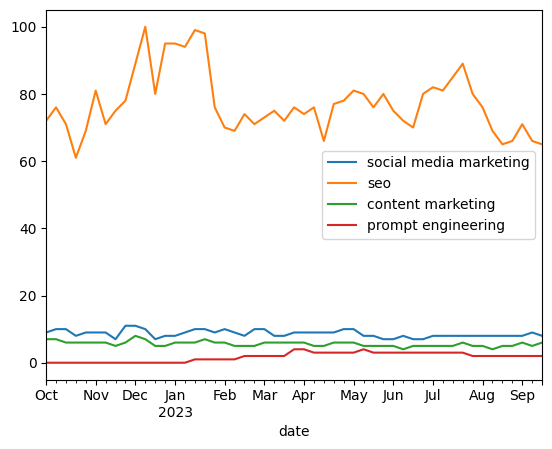

In [94]:
from matplotlib import pyplot
trends.plot()
pyplot.show()

# Forecasted Trends

Use the forecasting library from Facebook for predicting timeseries values

In [95]:
# install
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [131]:
df.columns[[0,2]]

Index(['social media marketing', 'content marketing'], dtype='object')

In [137]:
df = trends.reset_index()

# select first only
df = df[ df.columns[[0,4]] ]

# rename
df.columns = ['ds', 'y']

# fit the model
model = Prophet()
model.fit(df)

# important: use modeling best practices inlcuding appropriate holdout set for validation

07:43:46 - cmdstanpy - INFO - Chain [1] start processing
07:43:47 - cmdstanpy - INFO - Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2023-09-18  3.411103    2.329395    4.555511
1 2023-09-19  3.420680    2.261972    4.549017
2 2023-09-20  3.430256    2.323842    4.543063
3 2023-09-21  3.439833    2.343535    4.582389
4 2023-09-22  3.449409    2.421839    4.537578


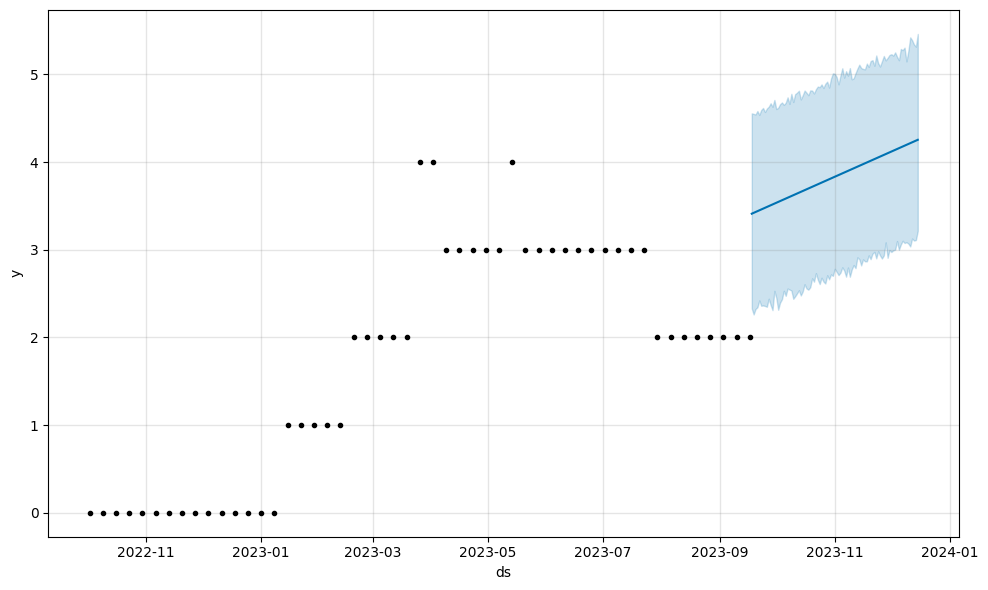

In [138]:
from pandas import to_datetime

future = list()
for days_to_add in range(1, 90):
    date = max(df['ds']) + timedelta(days=days_to_add)
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

# use the model to make a forecast
forecast = model.predict(future)

# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

# plot forecast
model.plot(forecast)
pyplot.show()

# Forecasted trend for each topic

Loop over each input topic and label the direction of the trend

In [220]:
from statistics import mean 
# create function for forecast
def forecast_direction_in_3months(trends, topic):
    
    df = trends.reset_index()

    # select topic only
    index_for_topic = list(df.columns).index(topic)
    df = df[ df.columns[[0,index_for_topic]] ]

    # rename
    df.columns = ['ds', 'y']

    # fit the model
    model = Prophet()
    model.fit(df)
    future = list()
    for days_to_add in range(1, 90):
        date = max(df['ds']) + timedelta(days=days_to_add)
        future.append([date])
    future = pd.DataFrame(future)
    future.columns = ['ds']
    future['ds']= to_datetime(future['ds'])

    # use the model to make a forecast
    forecast = model.predict(future)
    
    # current is avg of last 3
    current = mean(list(df['y'][len(df)-3:len(df)]))
    
    # predicted is last forcast
    predicted = mean(forecast['yhat'][len(forecast)-1:len(forecast)])
    
    slope = (predicted-current)/mean([predicted,current])
    
    direction = "flat"
    if slope > 0.1:
        direction = "up"
    if slope < -0.1:
        direction = "down"
    
    return current, predicted, slope, direction


In [221]:
# test

forecast_direction_in_3months( trends, 'social media marketing')

08:32:21 - cmdstanpy - INFO - Chain [1] start processing
08:32:21 - cmdstanpy - INFO - Chain [1] done processing


(8.333333333333334, 7.439898503892259, -0.11328494232013067, 'down')

In [222]:
# loop over each topic

results = []

for topic in trends.columns[0:-1]:
    
    current, predicted, slope, direction = forecast_direction_in_3months( trends, topic )
    
    results.append({
        "topic":topic,
        "current": current,
        "preducted": predicted,
        "slope": slope,
        "direction": direction
    })

pd.DataFrame( results )

08:32:24 - cmdstanpy - INFO - Chain [1] start processing
08:32:24 - cmdstanpy - INFO - Chain [1] done processing
08:32:24 - cmdstanpy - INFO - Chain [1] start processing
08:32:25 - cmdstanpy - INFO - Chain [1] done processing
08:32:25 - cmdstanpy - INFO - Chain [1] start processing
08:32:25 - cmdstanpy - INFO - Chain [1] done processing
08:32:25 - cmdstanpy - INFO - Chain [1] start processing
08:32:25 - cmdstanpy - INFO - Chain [1] done processing


,topic,current,preducted,slope,direction
0,social media marketing,8.333333,7.439899,-0.113285,down
1,seo,67.333333,71.964996,0.066500,flat
2,content marketing,5.666667,4.519896,-0.225154,down
3,prompt engineering,2.000000,4.253826,0.720783,up
